In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data = pd.read_csv('/Users/Sami/Documents/projet/Brief1_primeassurance/cleaneddata.csv')
X = data[['smoker','age', 'is_east', 'sex','bmi', 'is_north','children']]
y = data['charges']

In [3]:
X['bmi'] = (X['bmi'] - X['bmi'].mean())/X['bmi'].std()
X['age'] = (X['age'] - X['age'].mean())/X['age'].std()

/tmp/ipykernel_58777/181865680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bmi'] = (X['bmi'] - X['bmi'].mean())/X['bmi'].std()
/tmp/ipykernel_58777/181865680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = (X['age'] - X['age'].mean())/X['age'].std()


In [4]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.LinearRegression()

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

root mean squared error: 4577.96
Coefficient of determination: 0.89


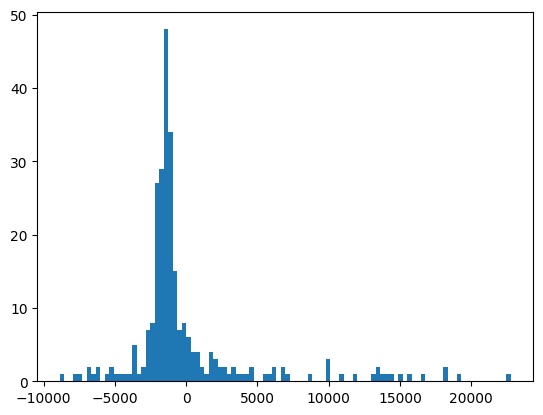

In [9]:
residuals = y_test - y_pred
plt.hist(residuals, bins=100)
plt.show()

In [5]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.Ridge(alpha=0.0001)

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

root mean squared error: 4577.96
Coefficient of determination: 0.89


In [6]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

model = linear_model.Ridge()

# test this range of alpha
alpha_range = np.arange(0.001, 2, 0.01)

param = {'alpha':alpha_range}

# score base on r2
grid_search_r2 = GridSearchCV(model,param_grid=param,cv=5)
grid_search_r2.fit(X_train, y_train)

# score base on MAE
grid_search_MAE = GridSearchCV(model,param_grid=param,scoring ='neg_mean_absolute_error',cv=5)
grid_search_MAE.fit(X_train, y_train)

print('Scoring R2')
print('Best R2 score   : ', grid_search_r2.best_score_)
print('Best parameters : ', grid_search_r2.best_params_)


print('Scoring RMSE')
print('Best RMSE score  : ', np.sqrt(-grid_search_MAE.best_score_))
print('Best parameters : ', grid_search_MAE.best_params_)

Scoring R2
Best R2 score   :  0.82193889958598
Best parameters :  {'alpha': np.float64(1.0309999999999997)}
Scoring RMSE
Best RMSE score  :  54.90542118665193
Best parameters :  {'alpha': np.float64(0.001)}


In [7]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.Lasso(alpha=0.01, tol=0.1)


# test this range of alpha
alpha_range = np.arange(0.001, 2, 0.01)

param = {'alpha':alpha_range}

# score base on r2
grid_search_r2 = GridSearchCV(model,param_grid=param,cv=5)
grid_search_r2.fit(X_train, y_train)

# score base on MAE
grid_search_MAE = GridSearchCV(model,param_grid=param,scoring ='neg_mean_absolute_error',cv=5)
grid_search_MAE.fit(X_train, y_train)

print('Scoring R2')
print('Best R2 score   : ', grid_search_r2.best_score_)
print('Best parameters : ', grid_search_r2.best_params_)


print('Scoring RMSE')
print('Best RMSE score  : ', np.sqrt(-grid_search_MAE.best_score_))
print('Best parameters : ', grid_search_MAE.best_params_)

Scoring R2
Best R2 score   :  0.82193889958598
Best parameters :  {'alpha': np.float64(1.0309999999999997)}
Scoring RMSE
Best RMSE score  :  54.90542118665193
Best parameters :  {'alpha': np.float64(0.001)}


In [8]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.Lasso(alpha=1.67, tol=0.1)

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

root mean squared error: 4706.97
Coefficient of determination: 0.88


In [9]:
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.LinearRegression()

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

root mean squared error: 4850.26
Coefficient of determination: 0.87


In [10]:
poly = PolynomialFeatures(degree=4)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

regression = linear_model.LinearRegression()

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

root mean squared error: 5411.63
Coefficient of determination: 0.84
